In [7]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

print("CUDA Available: ", torch.cuda.is_available())

CUDA Available:  False


In [4]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.36MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.58MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.69MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



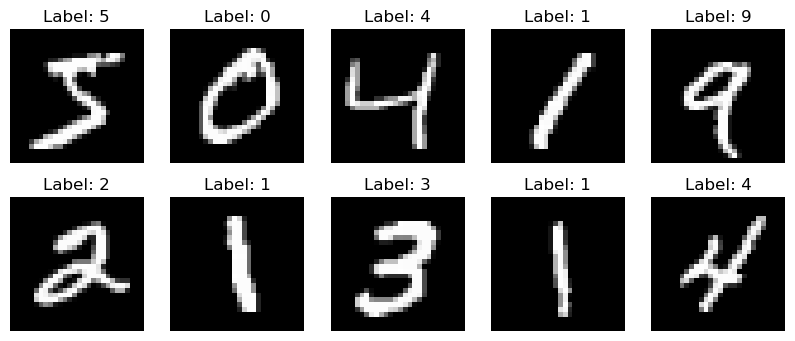

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(mnist_dataset[i][0].squeeze().numpy(), cmap="gray")
    ax.set_title(f"Label: {mnist_dataset[i][1]}")
    ax.axis("off")
plt.show()

In [19]:
num_images = len(mnist_dataset)
image_size = mnist_dataset[0][0].shape
unique_labels = set([mnist_dataset[i][1] for i in range(num_images)])

print(f'Dataset Size: {num_images} || Image Shape: {image_size}')
print(f'Labels: {unique_labels}')

Dataset Size: 60000 || Image Shape: torch.Size([1, 28, 28])
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from torch.utils.data import DataLoader, random_split

def test_train_split(train_ratio = 0.8, data = mnist_dataset):
    train_size = int(train_ratio * len(mnist_dataset))
    test_size = len(mnist_dataset) - train_size
    train_dataset, test_dataset = random_split(data, [train_size, test_size])
    return train_dataset, test_dataset

trainData, testData = test_train_split()
print(f'Train Dataset Dimensions: {len(trainData)} x {trainData[0][0].shape}')
print(f'Test Dataset Dimensions: {len(testData)} x {testData[0][0].shape}')

batch_size = 64
train_loader = DataLoader(trainData, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testData, batch_size=batch_size, shuffle=False)

Train Dataset Dimensions: 48000 x torch.Size([1, 28, 28])
Test Dataset Dimensions: 12000 x torch.Size([1, 28, 28])


In [39]:

import torch.nn as nn

class LinearNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
network = LinearNetwork(10, 20, 5)

input = torch.randn(10)

output = network(input)

print(f"Our output is {output}!")

Our output is tensor([-0.0784, -0.3512, -0.1324,  0.0929, -0.1764], grad_fn=<ViewBackward0>)!


In [ ]:
import torch.nn as nn

class NetworkWithReLU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x= self.relu(x)
        x = self.fc2(x)
        return x

network = NetworkWithReLU(10, 20, 5)
input = torch.randn(10)
output = network(input)
print(f"Our output is {output}!")

criterion = nn.MSELoss()

some_model = NetworkWithReLU(10, 20, 5)
learning_rate = 0.01
optimizer = torch.optim.SGD(some_model.parameters(), lr=learning_rate)

Our output is tensor([-0.1571,  0.0123, -0.2828,  0.0445,  0.0428], grad_fn=<ViewBackward0>)!


In [ ]:
class MNISTNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
input_size = 28 * 28
hidden_size = 128
output_size = 10
model = MNISTNetwork(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)



In [ ]:
epochs = 1000                 # number of times we iterate over the entire dataset
total_val_losses = []       # list to store the validation losses at each epoch
total_train_accuracies = []  # list to store training accuracies at each epoch
total_val_accuracies = []    # list to store validation accuracies at each epoch

# Training
for epoch in range(epochs):
    # total loss for each epoch         
    total_loss = 0     
    correct_train = 0
    total_train = 0
    # set the model to training mode. this is important because some layers 
    # (such as Dropout, BatchNorm) behave differently in training and testing mode.     
    model.train()                           
    
    # iterate over the training set in batches of 64 images. each iteration
    # returns a batch of 64 images and their labels.
    for (batch_X, batch_y) in train_loader:
        # zero out the gradients from the previous iteration. this is because
        # pytorch accumulates gradients.
        optimizer.zero_grad() 
        # forward pass. we get the outputs from the model using the inputs
        # from the batch. these outputs are probabilities for each class.             
        outputs = model(batch_X)
        # compute the loss between the outputs and the labels in the batch.  
        loss = criterion(outputs, batch_y)
        # backward pass. we compute the gradients of the loss with respect to
        # the learnable parameters of the model. 
        loss.backward()
        # update the learnable parameters of the model using the gradients
        # computed in the backward pass.
        optimizer.step()
        # add the loss of the batch to the total loss of the epoch.
        total_loss += loss.item()
        # calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()
    
    train_accuracy = 100 * correct_train / total_train

    # Validation/Testing Step.
    val_loss = 0
    correct_val = 0
    total_val = 0
    # We do not want to update the learnable parameters of the model when
    # we are evaluating the model. therefore, we set the model to evaluation
    # mode. 
    model.eval()

    # We do not want to compute the gradients when we are evaluating the model.
    # therefore, we use torch.no_grad() to disable gradient computation.
    with torch.no_grad():
        for (batch_X, batch_y) in test_loader:
            # forward pass. we get the outputs from the model using the inputs
            # from the batch. these outputs are probabilities for each class.
            val_outputs = model(batch_X)  
            # compute the loss between the outputs and the labels in the batch.
            loss = criterion(val_outputs, batch_y)  
            # add the loss of the batch to the total loss of the epoch.
            val_loss += loss.item()
            # calculate validation accuracy
            _, predicted = torch.max(val_outputs, 1)
            total_val += batch_y.size(0)
            correct_val += (predicted == batch_y).sum().item()
            

    
    val_accuracy = 100 * correct_val / total_val
    
    # compute the average metrics. we print these metrics for each epoch.
    batch_train_loss = total_loss / len(train_loader)
    batch_val_loss = val_loss / len(test_loader)
    total_val_losses.append(batch_val_loss)
    total_train_accuracies.append(train_accuracy)
    total_val_accuracies.append(val_accuracy)
    
    # loss should go down!
    print(f"Epoch {epoch + 1:2d}: Train Loss: {batch_train_loss:.6f} // Val Loss: {batch_val_loss:.6f} // Train Acc: {train_accuracy:.2f}% // Val Acc: {val_accuracy:.2f}%")


Epoch  1: Train Loss: 1.389828 // Val Loss: 0.705435 // Train Acc: 71.74% // Val Acc: 84.42%
Epoch  2: Train Loss: 0.561517 // Val Loss: 0.462248 // Train Acc: 86.39% // Val Acc: 88.07%
Epoch  3: Train Loss: 0.429468 // Val Loss: 0.392267 // Train Acc: 88.61% // Val Acc: 89.22%
Epoch  4: Train Loss: 0.379308 // Val Loss: 0.358489 // Train Acc: 89.54% // Val Acc: 90.03%
Epoch  5: Train Loss: 0.351377 // Val Loss: 0.336988 // Train Acc: 90.21% // Val Acc: 90.49%
Epoch  6: Train Loss: 0.332059 // Val Loss: 0.320809 // Train Acc: 90.64% // Val Acc: 91.04%
Epoch  7: Train Loss: 0.317096 // Val Loss: 0.308065 // Train Acc: 91.08% // Val Acc: 91.21%
Epoch  8: Train Loss: 0.304636 // Val Loss: 0.298257 // Train Acc: 91.36% // Val Acc: 91.68%
Epoch  9: Train Loss: 0.293633 // Val Loss: 0.288982 // Train Acc: 91.67% // Val Acc: 91.99%
Epoch 10: Train Loss: 0.284030 // Val Loss: 0.279893 // Train Acc: 91.97% // Val Acc: 92.22%
Epoch 11: Train Loss: 0.274847 // Val Loss: 0.273112 // Train Acc: 92.